In [12]:
#顯示系統資訊
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3964767710038430928
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 17023631109653595144
physical_device_desc: "device: XLA_CPU device"
]


In [13]:
#import 相關函式
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU, Conv2D, Flatten
from keras.utils import np_utils
from keras.optimizers import RMSprop
from keras.backend.tensorflow_backend import set_session 
from keras import backend as K
K.tensorflow_backend._get_available_gpus()
from matplotlib.pyplot import imshow
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
%matplotlib inline
#設定CPU使用量
config = tf.ConfigProto() 
config.gpu_options.per_process_gpu_memory_fraction = 0.9
set_session(tf.Session(config=config))

In [14]:
#Loss 紀錄函式 提供繪製 acc-loss 圖
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}

    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))

    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))

    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        # acc
        plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
        # loss
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # val_acc
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.show()

In [15]:
# 抓 mnist 資料,資料轉換對應的維度
(x_train, y_train), (x_test_org, y_test_org) = mnist.load_data()

print('shape of train data   [', x_train.shape[0], x_train.shape[1], x_train.shape[2],"]")
print('shape of test  data   [', x_test_org.shape[0], x_test_org.shape[1], x_test_org.shape[2],"]")
x_train = x_train.reshape(60000, 784).astype('float32')
x_test  = x_test_org.reshape(10000, 784).astype('float32')
# 0~255 映射到 0~1
x_train /= 255
x_test /= 255
print('reshape of train data [', x_train.shape[0], x_train.shape[1],"]")
print('reshape of test  data [', x_test.shape[0], x_test.shape[1],"]")
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test_org)
print()
print("To Categorical [", y_test_org[0], "] => ", y_test[0])

history = LossHistory()

shape of train data   [ 60000 28 28 ]
shape of test  data   [ 10000 28 28 ]
reshape of train data [ 60000 784 ]
reshape of test  data [ 10000 784 ]

To Categorical [ 7 ] =>  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [16]:
# MLP模型建置
model = Sequential()

model.add(Dense(20, activation='relu', input_shape=(784,)))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_5 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________


In [17]:
# 開始訓練
train_history = model.fit(x_train, y_train,
            batch_size=128,
            epochs=10,
            verbose=1,
            validation_data=(x_test, y_test),
            callbacks=[history])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 9us/step - loss: 0.5257 - acc: 0.8574 - val_loss: 0.2762 - val_acc: 0.9206
Epoch 2/10
60000/60000 [==============================] - 0s 7us/step - loss: 0.2520 - acc: 0.9280 - val_loss: 0.2253 - val_acc: 0.9343
Epoch 3/10
60000/60000 [==============================] - 0s 7us/step - loss: 0.2098 - acc: 0.9402 - val_loss: 0.1882 - val_acc: 0.9457
Epoch 4/10
60000/60000 [==============================] - 0s 7us/step - loss: 0.1853 - acc: 0.9471 - val_loss: 0.1733 - val_acc: 0.9526
Epoch 5/10
60000/60000 [==============================] - 0s 7us/step - loss: 0.1676 - acc: 0.9517 - val_loss: 0.1593 - val_acc: 0.9554
Epoch 6/10
60000/60000 [==============================] - 0s 7us/step - loss: 0.1551 - acc: 0.9551 - val_loss: 0.1564 - val_acc: 0.9560
Epoch 7/10
60000/60000 [==============================] - 0s 7us/step - loss: 0.1448 - acc: 0.9581 - val_loss: 0.1575 - val_acc: 0.956

10000/10000 [==============================] - 0s 40us/step
[Info] Accuracy of testing data = 95.9%

Test score: 0.14671600601952522
Test accuracy: 0.9594


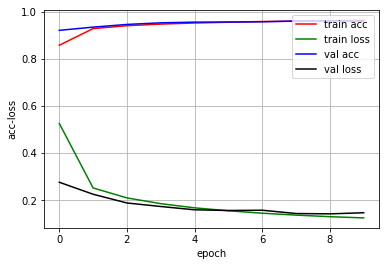

In [19]:
# 模型评估
score = model.evaluate(x_test, y_test, verbose=1)
print("[Info] Accuracy of testing data = {:2.1f}%".format(score[1]*100.0))  
print()
print('Test score:', score[0])
print('Test accuracy:', score[1])

# 繪製 acc-loss 曲线
history.loss_plot('epoch')

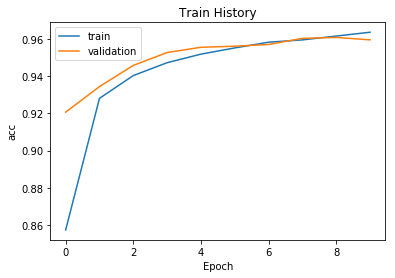

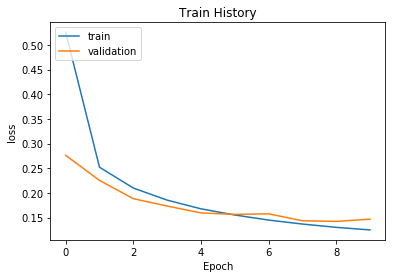

In [20]:
# 個別繪製 acc and loss 曲线
from utils import *  
if isDisplayAvl():  
    show_train_history(train_history, 'acc', 'val_acc')  
    show_train_history(train_history, 'loss', 'val_loss')  

[5 9 8 7 2 3 0 2 4 2]



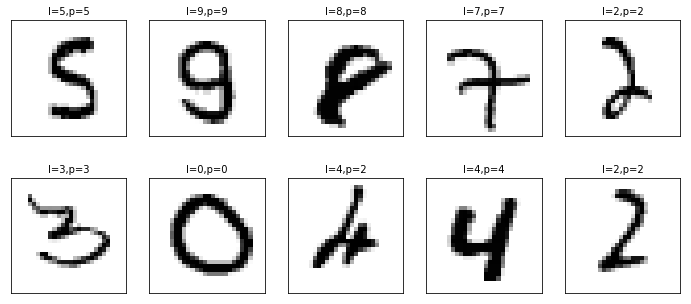

[Info] Display Confusion Matrix:
predict    0     1    2    3    4    5    6    7    8    9
label                                                     
0        970     0    2    1    3    1    1    1    1    0
1          0  1125    4    1    1    1    1    0    2    0
2          9     7  978   16    3    1    5    6    4    3
3          2     1    5  986    1    2    0    5    4    4
4          1     2    7    0  947    1    4    3    2   15
5         12     0    0   23    4  838    5    2    5    3
6         15     3    6    0    3   10  917    0    4    0
7          2     9   10    7    2    0    0  987    0   11
8          7     8    4   15    8   10    3   10  906    3
9          7     7    1   16   23    3    0    8    4  940



In [21]:
# 模型评估 數據比對
prediction = model.predict_classes(x_test)  # Making prediction and save result to prediction  
print("%s\n" % (prediction[240:250]))  
if isDisplayAvl():  
    plot_images_labels_predict(x_test_org, y_test_org, prediction, idx=240) 
    
# 模型评估 數據分布統計  
import pandas as pd  
print("[Info] Display Confusion Matrix:")  
print("%s\n" % pd.crosstab(y_test_org, prediction, rownames=['label'], colnames=['predict']))  